In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
#For some Statistics
from scipy.stats import norm, skew
from sklearn.preprocessing import Imputer

In [2]:

data_main = pd.read_excel("C:/Users/Naitik/Desktop/default of credit card clients.xls",index_col=0)    


In [3]:
data_main.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
data_main.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

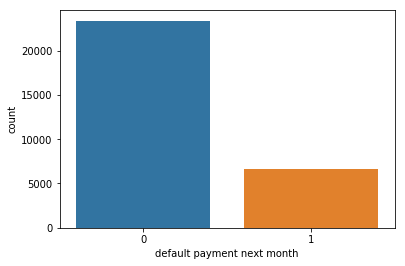

In [6]:
sns.countplot(data_main['default payment next month'])
total=data_main['default payment next month'].count()
zero=data_main[data_main['default payment next month']==0].shape[0]
one=data_main[data_main['default payment next month']==1].shape[0]
percent_zero=zero/total
percent_one=one/total

##Observations:
##For the entire data set, approximately 22.1% of the individuals defaulted.
##For the entire data set, approximately 77.88% of the individuals are not defaulted.

In [7]:
unique_values = {}
cat_col=[]
num_col=[]
for column in data_main.columns:
    unique_values[column] = len(np.unique(data_main[column]))
    if(len(np.unique(data_main[column]))<=11):
        cat_col.append(column)
        data_main[column]=data_main[column].astype(np.object)
    else:
        num_col.append(column)
data_main['default payment next month']=data_main['default payment next month'].astype(np.int64)        
print(unique_values)
print(cat_col)
print(num_col)


{u'AGE': 56, u'SEX': 2, u'PAY_6': 10, u'PAY_4': 11, u'PAY_5': 10, u'PAY_2': 11, u'PAY_3': 11, u'PAY_0': 11, u'BILL_AMT5': 21010, u'BILL_AMT4': 21548, u'BILL_AMT6': 20604, u'BILL_AMT1': 22723, u'BILL_AMT3': 22026, u'BILL_AMT2': 22346, u'default payment next month': 2, u'PAY_AMT6': 6939, u'PAY_AMT5': 6897, u'PAY_AMT4': 6937, u'PAY_AMT3': 7518, u'PAY_AMT2': 7899, u'PAY_AMT1': 7943, u'LIMIT_BAL': 81, u'MARRIAGE': 4, u'EDUCATION': 7}
[u'SEX', u'EDUCATION', u'MARRIAGE', u'PAY_0', u'PAY_2', u'PAY_3', u'PAY_4', u'PAY_5', u'PAY_6', u'default payment next month']
[u'LIMIT_BAL', u'AGE', u'BILL_AMT1', u'BILL_AMT2', u'BILL_AMT3', u'BILL_AMT4', u'BILL_AMT5', u'BILL_AMT6', u'PAY_AMT1', u'PAY_AMT2', u'PAY_AMT3', u'PAY_AMT4', u'PAY_AMT5', u'PAY_AMT6']


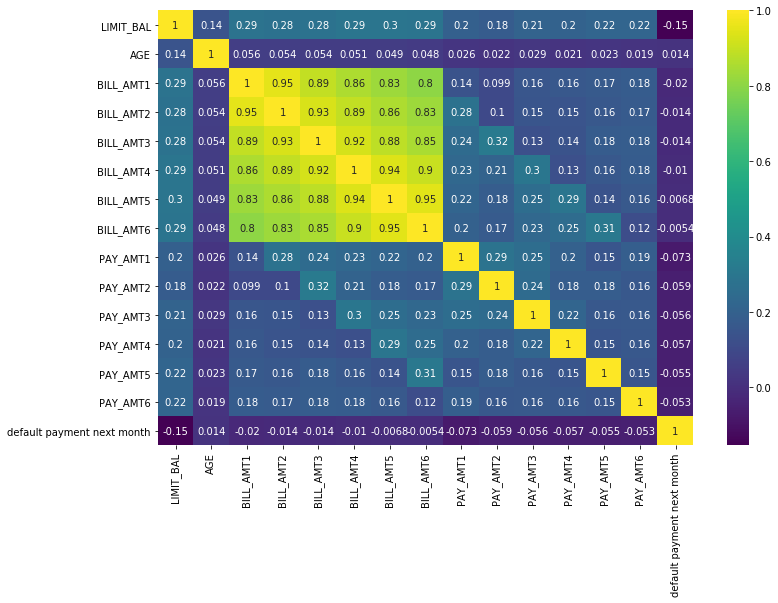

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data_main.corr(), cmap='viridis',annot=True)

default payment next month      0     1
SEX                                    
1                            9015  2873
2                           14349  3763
default payment next month      0     1
EDUCATION                              
0                              14     0
1                            8549  2036
2                           10700  3330
3                            3680  1237
4                             116     7
5                             262    18
6                              43     8
default payment next month      0     1
MARRIAGE                               
0                              49     5
1                           10453  3206
2                           12623  3341
3                             239    84
default payment next month      0     1
PAY_0                                  
-2                           2394   365
-1                           4732   954
 0                          12849  1888
 1                           2436  1252


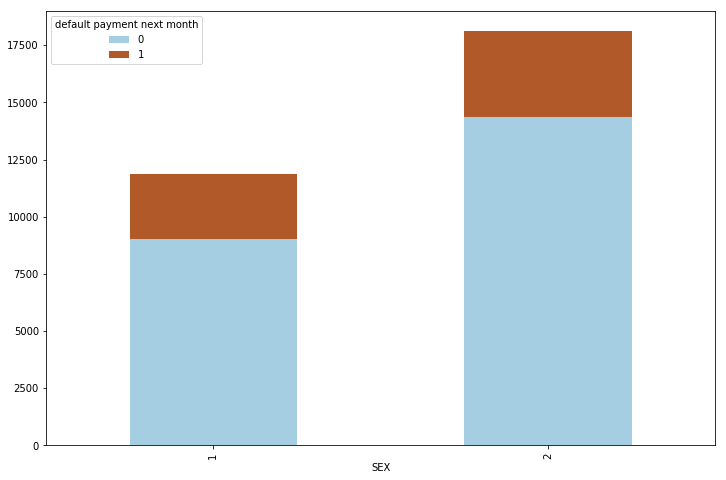

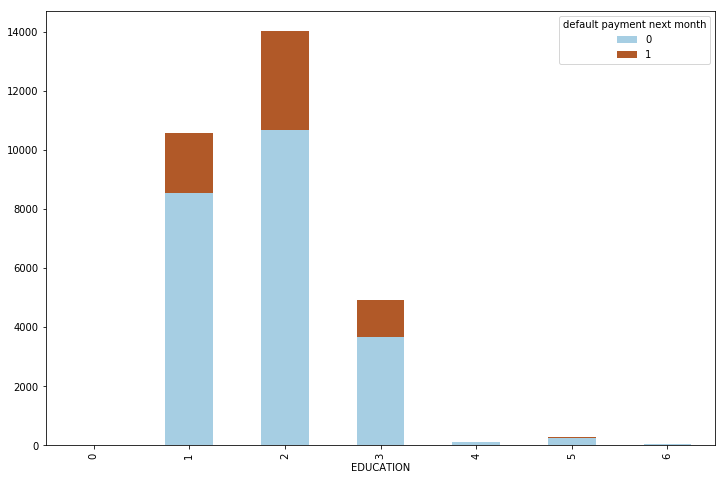

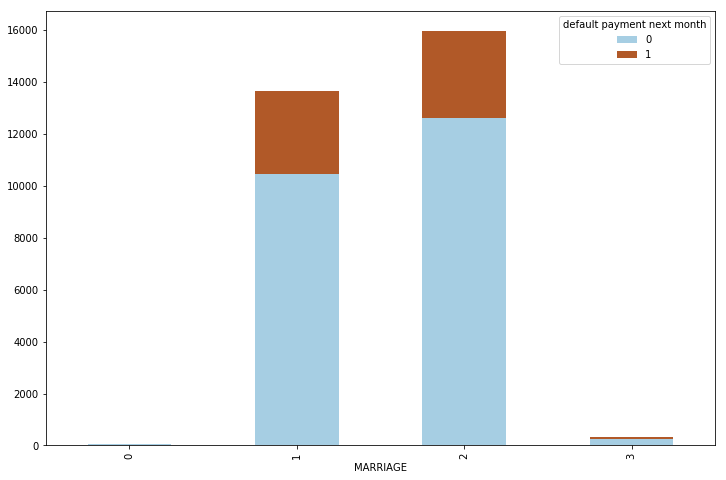

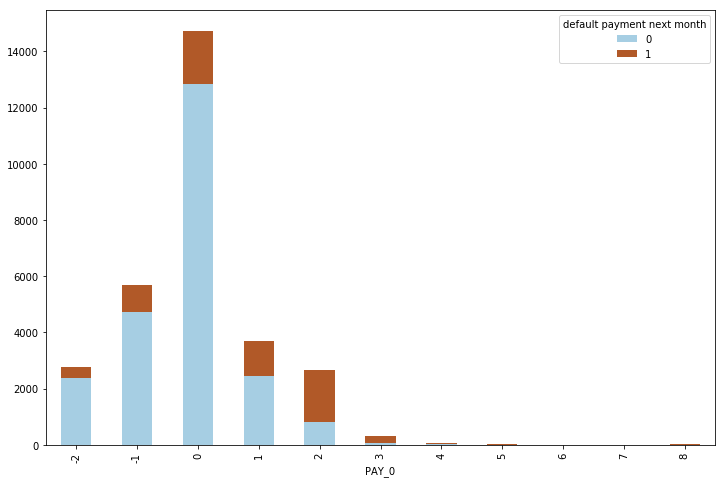

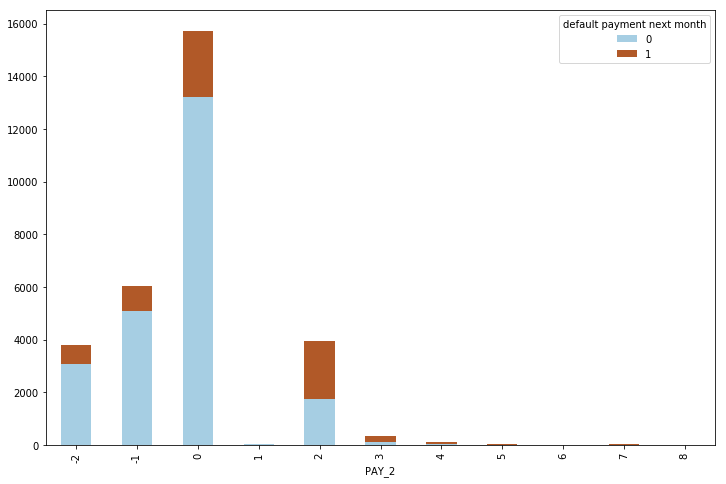

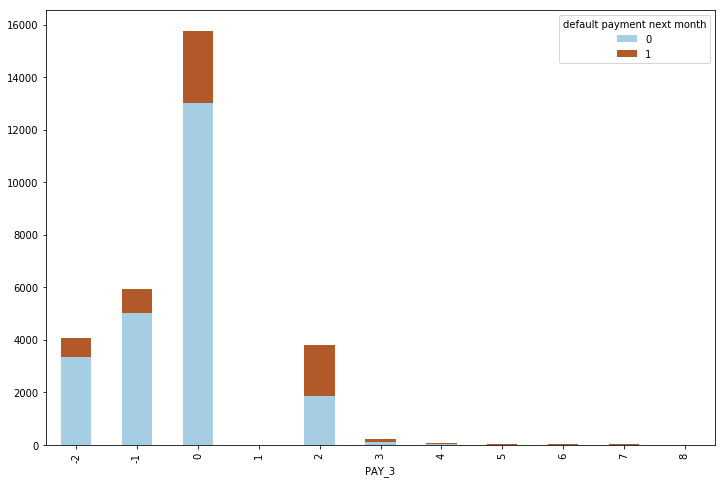

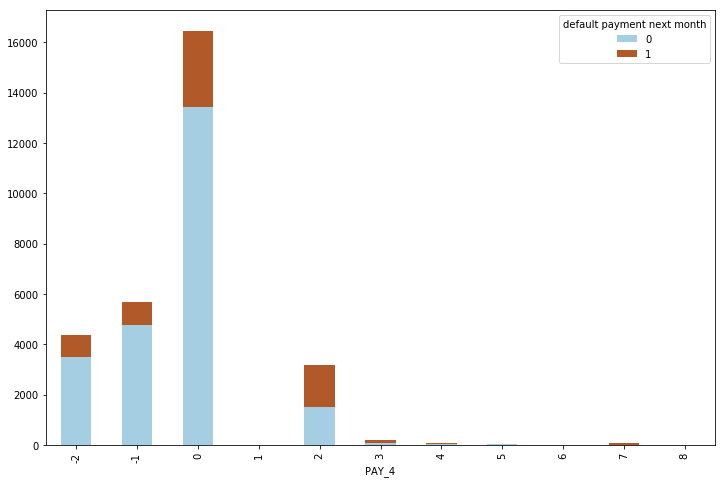

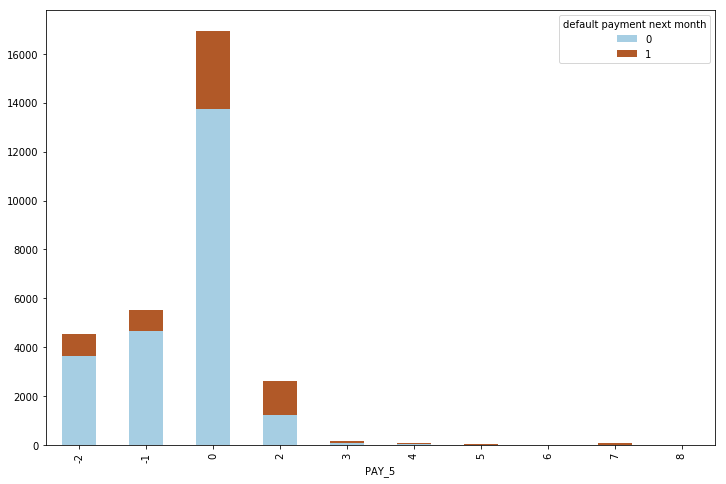

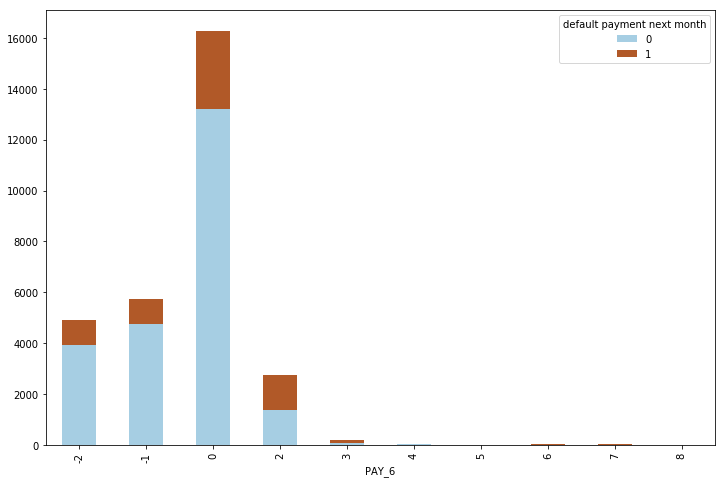

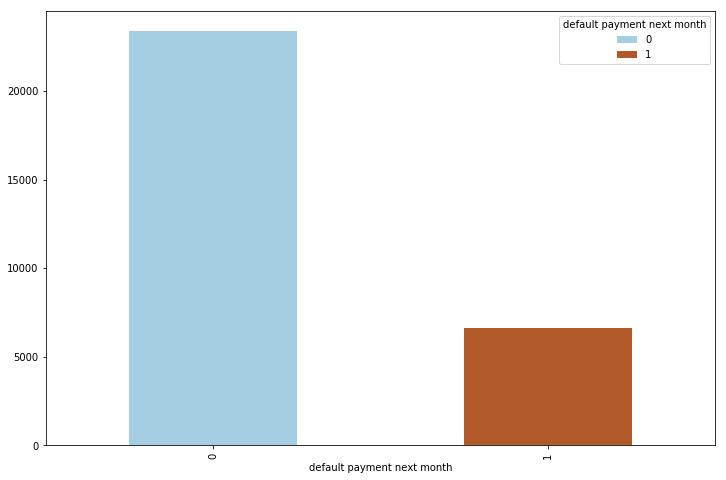

In [9]:
for i in cat_col:
    crosstab = pd.crosstab(index=data_main[i], columns=data_main['default payment next month'])
    print(crosstab)
    crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [10]:
def replaceEducationjunk(df):
    df['EDUCATION'].replace(0, 4,inplace=True)
    df['EDUCATION'].replace(5, 4,inplace=True)
    df['EDUCATION'].replace(6, 4,inplace=True)
    return df
replaceEducationjunk(data_main)
crosstab = pd.crosstab(index=data_main['EDUCATION'], columns=data_main['default payment next month'])
print(crosstab)

def replaceMARRIAGEjunk(df):
    df['MARRIAGE'].replace(0, 3,inplace=True)
    return df
replaceMARRIAGEjunk(data_main)
crosstab = pd.crosstab(index=data_main['MARRIAGE'], columns=data_main['default payment next month'])
print(crosstab)
# Log-transform the skewed features
skewed = num_col
features_log_transformed = pd.DataFrame(data = data_main)
features_log_transformed[skewed] = data_main[skewed].apply(lambda x: np.log(x + 1))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_main[num_col] = scaler.fit_transform(data_main[num_col])

cat_col2=['SEX','MARRIAGE','EDUCATION']
data_main=pd.get_dummies(data_main,columns=cat_col2,drop_first=True)
data_main.info()

default payment next month      0     1
EDUCATION                              
1                            8549  2036
2                           10700  3330
3                            3680  1237
4                             435    33
default payment next month      0     1
MARRIAGE                               
1                           10453  3206
2                           12623  3341
3                             288    89


C:\Users\Naitik\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
C:\Users\Naitik\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 27 columns):
LIMIT_BAL                     30000 non-null float64
AGE                           30000 non-null float64
PAY_0                         30000 non-null object
PAY_2                         30000 non-null object
PAY_3                         30000 non-null object
PAY_4                         30000 non-null object
PAY_5                         30000 non-null object
PAY_6                         30000 non-null object
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1                      30000 non-null float64
PAY_AMT2                      30000 non-null float64
PAY_AMT3                      30000 non-null floa

In [11]:
#Observations:num_cat
#Approximately 24.2% of the males defaulted.
#Approximately 20.8% of the females defaulted.

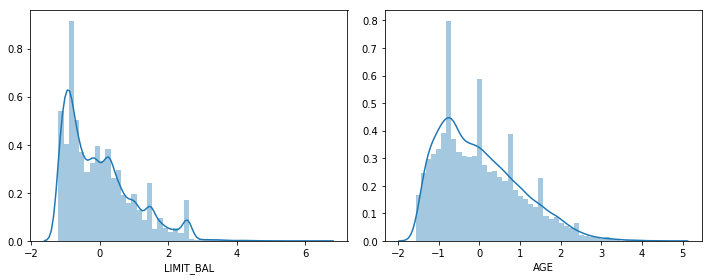

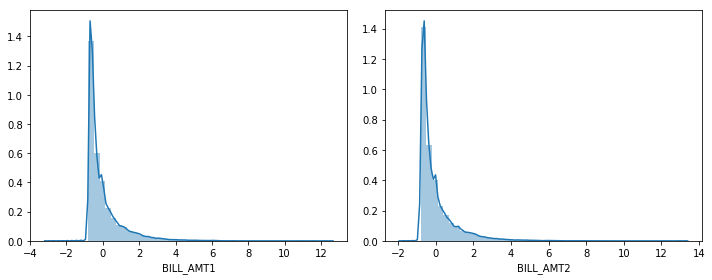

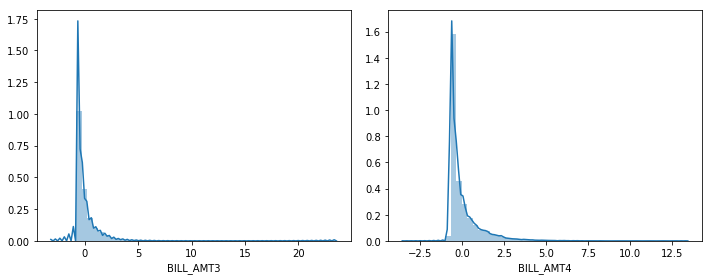

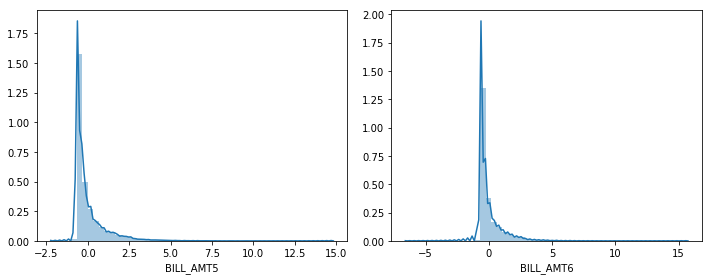

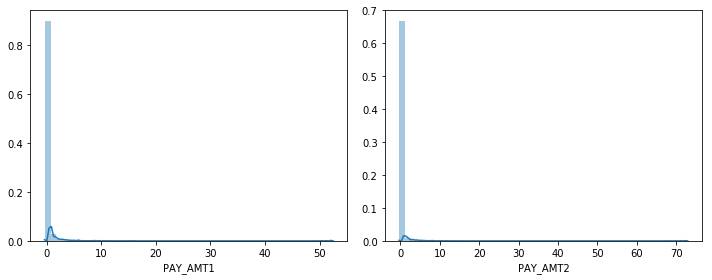

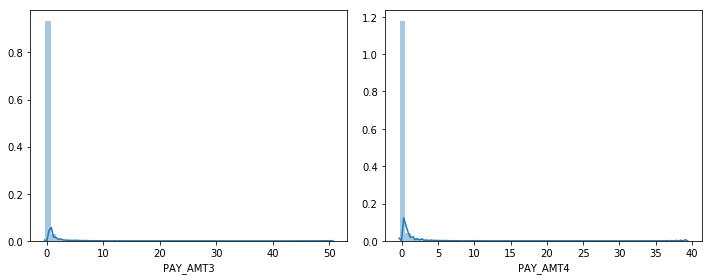

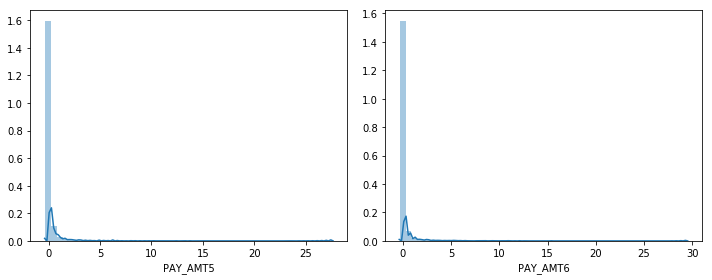

In [12]:
num_cols = num_col
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(data_main[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(data_main[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(data_main[num_cols[i]], hist=True, kde=True)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,recall_score,f1_score,roc_auc_score,confusion_matrix,precision_score,classification_report,make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [14]:
"""
#score for Logistic regression test 20%
print("Accuracy Score"+str(accuracy_score(y_test, y_pred)))
print("ROC AUC Score"+str(roc_auc_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print(pipeline.predict_proba(X_test))
"""

'\n#score for Logistic regression test 20%\nprint("Accuracy Score"+str(accuracy_score(y_test, y_pred)))\nprint("ROC AUC Score"+str(roc_auc_score(y_test, y_pred)))\nprint(classification_report(y_test, y_pred))\nprint(pipeline.predict_proba(X_test))\n'

In [15]:
data_main2=data_main.copy()

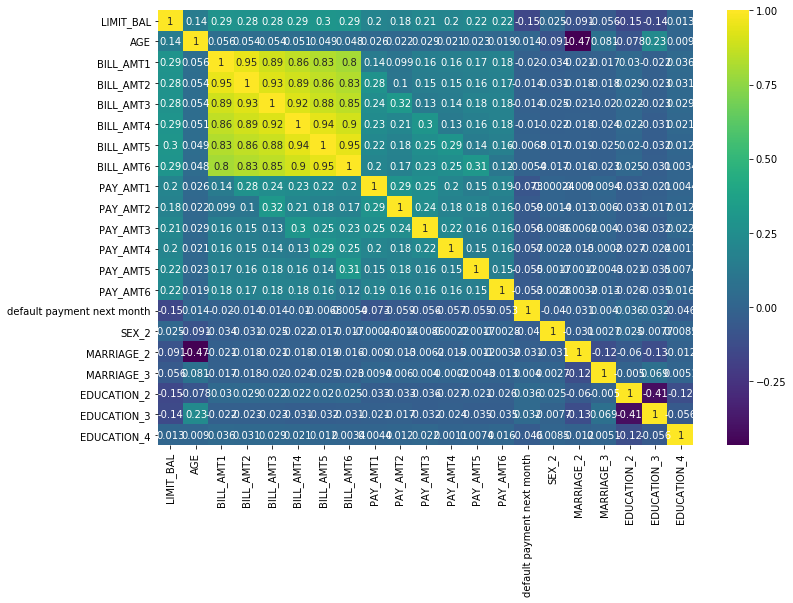

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data_main2.corr(), cmap='viridis',annot=True)


In [17]:
data_main2['c1']=(data_main2['BILL_AMT1']-data_main2['PAY_AMT1'])/data_main2['LIMIT_BAL']
data_main2['c2']=(data_main2['BILL_AMT2']-data_main2['PAY_AMT2'])/data_main2['LIMIT_BAL']
data_main2['c3']=(data_main2['BILL_AMT3']-data_main2['PAY_AMT3'])/data_main2['LIMIT_BAL']
data_main2['c4']=(data_main2['BILL_AMT4']-data_main2['PAY_AMT4'])/data_main2['LIMIT_BAL']
data_main2['c5']=(data_main2['BILL_AMT5']-data_main2['PAY_AMT5'])/data_main2['LIMIT_BAL']
data_main2['c6']=(data_main2['BILL_AMT6']-data_main2['PAY_AMT6'])/data_main2['LIMIT_BAL']

In [18]:
data_main2.drop(labels=['BILL_AMT1'],inplace=True,axis=1)
data_main2.drop(labels=['BILL_AMT2'],inplace=True,axis=1)
data_main2.drop(labels=['BILL_AMT3'],inplace=True,axis=1)
data_main2.drop(labels=['BILL_AMT4'],inplace=True,axis=1)
data_main2.drop(labels=['BILL_AMT5'],inplace=True,axis=1)
data_main2.drop(labels=['BILL_AMT6'],inplace=True,axis=1)

data_main2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 27 columns):
LIMIT_BAL                     30000 non-null float64
AGE                           30000 non-null float64
PAY_0                         30000 non-null object
PAY_2                         30000 non-null object
PAY_3                         30000 non-null object
PAY_4                         30000 non-null object
PAY_5                         30000 non-null object
PAY_6                         30000 non-null object
PAY_AMT1                      30000 non-null float64
PAY_AMT2                      30000 non-null float64
PAY_AMT3                      30000 non-null float64
PAY_AMT4                      30000 non-null float64
PAY_AMT5                      30000 non-null float64
PAY_AMT6                      30000 non-null float64
default payment next month    30000 non-null int64
SEX_2                         30000 non-null uint8
MARRIAGE_2                    30000 non-null uint8
MA

In [19]:
import warnings
warnings.filterwarnings("ignore")
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import xgboost as xgb

In [20]:
X_new = data_main2.drop('default payment next month',axis=1)
y_new = data_main2['default payment next month']
X2_train_new1,X2_test_new1,y2_train_new1,y2_test_new1= train_test_split(X_new,y_new,test_size=0.20)
X2_train_new,X2_testd_new,y2_train_new,y2_testd_new= train_test_split(X2_train_new1,y2_train_new1,test_size=0.30)


In [21]:
X2_train_new['default payment next month'] = y2_train_new 


In [22]:
predictors = X2_train_new.iloc[:,:-1].columns

In [23]:
X2_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16800 entries, 7332 to 28052
Data columns (total 27 columns):
LIMIT_BAL                     16800 non-null float64
AGE                           16800 non-null float64
PAY_0                         16800 non-null object
PAY_2                         16800 non-null object
PAY_3                         16800 non-null object
PAY_4                         16800 non-null object
PAY_5                         16800 non-null object
PAY_6                         16800 non-null object
PAY_AMT1                      16800 non-null float64
PAY_AMT2                      16800 non-null float64
PAY_AMT3                      16800 non-null float64
PAY_AMT4                      16800 non-null float64
PAY_AMT5                      16800 non-null float64
PAY_AMT6                      16800 non-null float64
SEX_2                         16800 non-null uint8
MARRIAGE_2                    16800 non-null uint8
MARRIAGE_3                    16800 non-null uint8

In [24]:
cols_change = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [25]:
X2_train_new[cols_change] = X2_train_new[cols_change].astype(dtype=np.int64) 

In [26]:
target  = 'default payment next month'

In [27]:
X2_testd_new[cols_change] = X2_testd_new[cols_change].astype(dtype=np.int64) 

In [28]:
X2_test_new1[cols_change] = X2_test_new1[cols_change].astype(dtype=np.int64) 

In [29]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

        
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob)
    print(metrics.classification_report(dtrain[target].values, dtrain_predictions)) 
    print(metrics.confusion_matrix(dtrain[target].values, dtrain_predictions))
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8371
AUC Score (Train): 0.819921
             precision    recall  f1-score   support

          0       0.85      0.96      0.90     13123
          1       0.73      0.40      0.52      3677

avg / total       0.83      0.84      0.82     16800

[[12590   533]
 [ 2203  1474]]


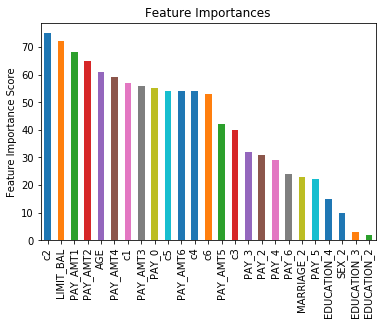

In [30]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, X2_train_new, predictors)

In [31]:
y_pred_xgb1=xgb1.predict(X2_testd_new) #y2_testd_new
y_pred_xgb1_prob = xgb1.predict_proba(X2_testd_new)[:,1]

print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y2_testd_new, y_pred_xgb1)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y2_testd_new, y_pred_xgb1_prob)
print(metrics.confusion_matrix(y2_testd_new, y_pred_xgb1))


Model Report
Accuracy : 0.8246
AUC Score (Train): 0.779646
[[5388  264]
 [ 999  549]]


In [32]:
"""
def modelfit1(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X2_test_new1)
    dtrain_predprob = alg.predict_proba(X2_testd_new)[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    """

'\ndef modelfit1(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):\n    \n    if useTrainCV:\n        xgb_param = alg.get_xgb_params()\n        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)\n        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()[\'n_estimators\'], nfold=cv_folds,\n            metrics=\'auc\', early_stopping_rounds=early_stopping_rounds)\n        alg.set_params(n_estimators=cvresult.shape[0])\n    \n    #Fit the algorithm on the data\n    alg.fit(dtrain[predictors], dtrain[target],eval_metric=\'auc\')\n        \n    #Predict training set:\n    dtrain_predictions = alg.predict(X2_test_new1)\n    dtrain_predprob = alg.predict_proba(X2_testd_new)[:,1]\n        \n    #Print model report:\n    print "\nModel Report"\n    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions)\n    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrai

# Tune 1:Tune max depth and min child

In [33]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X2_train_new[predictors],X2_train_new[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.77784, std: 0.01350, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.77846, std: 0.01303, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.77819, std: 0.01282, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.77396, std: 0.01457, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.77541, std: 0.01336, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.77262, std: 0.01432, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.76899, std: 0.01362, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.76923, std: 0.01362, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.77031, std: 0.01349, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.76449, std: 0.01521, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.76637, std: 0.01511, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.76463, std: 0.01368, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 3, 'min_child_weight': 3

In [34]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X2_train_new[predictors],X2_train_new[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.77777, std: 0.01166, params: {'max_depth': 2, 'min_child_weight': 4},
  mean: 0.77768, std: 0.01149, params: {'max_depth': 2, 'min_child_weight': 5},
  mean: 0.77720, std: 0.01232, params: {'max_depth': 2, 'min_child_weight': 6},
  mean: 0.77815, std: 0.01283, params: {'max_depth': 3, 'min_child_weight': 4},
  mean: 0.77819, std: 0.01282, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.77760, std: 0.01311, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: 0.77565, std: 0.01371, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.77598, std: 0.01403, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.77609, std: 0.01431, params: {'max_depth': 4, 'min_child_weight': 6}],
 {'max_depth': 3, 'min_child_weight': 5},
 0.7781933666616169)

In [35]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=3,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(X2_train_new[predictors],X2_train_new[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=2, missing=None, n_estimators=140, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_child_weight': [6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [37]:
#modelfit(gsearch3.best_estimator_, X2_train_new, predictors)

gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_


([mean: 0.77760, std: 0.01311, params: {'min_child_weight': 6},
  mean: 0.77800, std: 0.01350, params: {'min_child_weight': 8},
  mean: 0.77810, std: 0.01320, params: {'min_child_weight': 10},
  mean: 0.77730, std: 0.01363, params: {'min_child_weight': 12}],
 {'min_child_weight': 10},
 0.7780955508209951)

# Tune 2: Gamma

In [38]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=12, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X2_train_new[predictors],X2_train_new[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_


([mean: 0.77730, std: 0.01363, params: {'gamma': 0.0},
  mean: 0.77730, std: 0.01363, params: {'gamma': 0.1},
  mean: 0.77730, std: 0.01363, params: {'gamma': 0.2},
  mean: 0.77722, std: 0.01365, params: {'gamma': 0.3},
  mean: 0.77722, std: 0.01365, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.777302889515297)


Model Report
Accuracy : 0.8281
AUC Score (Train): 0.802873
             precision    recall  f1-score   support

          0       0.85      0.95      0.90     13123
          1       0.69      0.38      0.49      3677

avg / total       0.81      0.83      0.81     16800

[[12501   622]
 [ 2266  1411]]


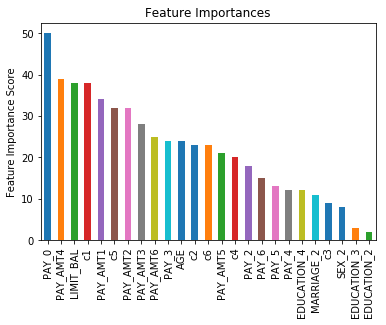

In [39]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=12,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, X2_train_new, predictors)


In [40]:
y_pred_xgb2=xgb2.predict(X2_testd_new) #y2_testd_new
y_pred_xgb2_prob = xgb2.predict_proba(X2_testd_new)[:,1]

print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y2_testd_new, y_pred_xgb2)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y2_testd_new, y_pred_xgb2_prob)
print(metrics.confusion_matrix(y2_testd_new, y_pred_xgb2))


Model Report
Accuracy : 0.825
AUC Score (Train): 0.778110
[[5380  272]
 [ 988  560]]


In [41]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=3,
 min_child_weight=12, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X2_train_new[predictors],X2_train_new[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.77616, std: 0.01353, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.77745, std: 0.01287, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.77665, std: 0.01214, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.77739, std: 0.01329, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.77645, std: 0.01301, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.77761, std: 0.01270, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.77651, std: 0.01356, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.77707, std: 0.01209, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.77595, std: 0.01305, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.77683, std: 0.01215, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.77688, std: 0.01365, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.77618, std: 0.01282, params: {'subsample': 0.9, 'colsample_bytree'

In [42]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=3,
 min_child_weight=12, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X2_train_new[predictors],X2_train_new[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.2, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=12, missing=None, n_estimators=177, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.75, 0.8, 0.85], 'colsample_bytree': [0.75, 0.8, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [43]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.77678, std: 0.01327, params: {'subsample': 0.75, 'colsample_bytree': 0.75},
  mean: 0.77748, std: 0.01403, params: {'subsample': 0.8, 'colsample_bytree': 0.75},
  mean: 0.77670, std: 0.01331, params: {'subsample': 0.85, 'colsample_bytree': 0.75},
  mean: 0.77671, std: 0.01347, params: {'subsample': 0.75, 'colsample_bytree': 0.8},
  mean: 0.77688, std: 0.01365, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.77697, std: 0.01281, params: {'subsample': 0.85, 'colsample_bytree': 0.8},
  mean: 0.77666, std: 0.01317, params: {'subsample': 0.75, 'colsample_bytree': 0.85},
  mean: 0.77684, std: 0.01348, params: {'subsample': 0.8, 'colsample_bytree': 0.85},
  mean: 0.77761, std: 0.01291, params: {'subsample': 0.85, 'colsample_bytree': 0.85}],
 {'colsample_bytree': 0.85, 'subsample': 0.85},
 0.7776086080993019)

In [44]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=3,
 min_child_weight=12, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X2_train_new[predictors],X2_train_new[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.77688, std: 0.01365, params: {'reg_alpha': 1e-05},
  mean: 0.77705, std: 0.01415, params: {'reg_alpha': 0.01},
  mean: 0.77753, std: 0.01397, params: {'reg_alpha': 0.1},
  mean: 0.77804, std: 0.01370, params: {'reg_alpha': 1},
  mean: 0.77513, std: 0.00936, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.7780351021653422)


Model Report
Accuracy : 0.8281
AUC Score (Train): 0.802864
             precision    recall  f1-score   support

          0       0.85      0.95      0.90     13123
          1       0.69      0.38      0.49      3677

avg / total       0.81      0.83      0.81     16800

[[12501   622]
 [ 2266  1411]]


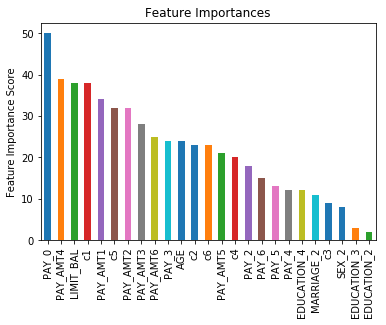

In [45]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=12,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.01,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, X2_train_new, predictors)


In [46]:
y_pred_xgb3=xgb3.predict(X2_testd_new) #y2_testd_new
y_pred_xgb3_prob = xgb3.predict_proba(X2_testd_new)[:,1]

print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y2_testd_new, y_pred_xgb3)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y2_testd_new, y_pred_xgb3_prob)
print(metrics.confusion_matrix(y2_testd_new, y_pred_xgb3))


Model Report
Accuracy : 0.825
AUC Score (Train): 0.778111
[[5380  272]
 [ 988  560]]



Model Report
Accuracy : 0.8283
AUC Score (Train): 0.801161
             precision    recall  f1-score   support

          0       0.85      0.95      0.90     13123
          1       0.70      0.38      0.49      3677

avg / total       0.81      0.83      0.81     16800

[[12506   617]
 [ 2267  1410]]


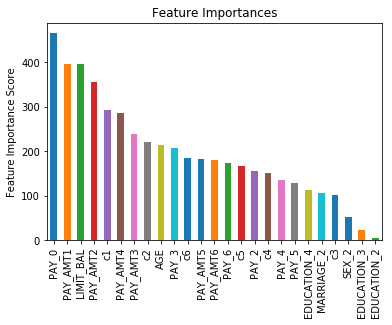

In [47]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=12,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.01,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, X2_train_new, predictors)


In [48]:
y_pred_xgb4=xgb4.predict(X2_testd_new) #y2_testd_new
y_pred_xgb4_prob = xgb4.predict_proba(X2_testd_new)[:,1]

print "\nModel Report Test"
print "Accuracy : %.4g" % metrics.accuracy_score(y2_testd_new, y_pred_xgb4)
print "AUC Score (Test): %f" % metrics.roc_auc_score(y2_testd_new, y_pred_xgb4_prob)
print(metrics.confusion_matrix(y2_testd_new, y_pred_xgb4))
print(metrics.classification_report(y2_testd_new, y_pred_xgb4))


Model Report Test
Accuracy : 0.825
AUC Score (Test): 0.778665
[[5384  268]
 [ 992  556]]
             precision    recall  f1-score   support

          0       0.84      0.95      0.90      5652
          1       0.67      0.36      0.47      1548

avg / total       0.81      0.82      0.80      7200



In [49]:
y_pred_xgb4=xgb4.predict(X2_test_new1) #y2_testd_new
y_pred_xgb4_prob = xgb4.predict_proba(X2_test_new1)[:,1]

print "\nModel Report Test Fnal"
print "Accuracy : %.4g" % metrics.accuracy_score(y2_test_new1, y_pred_xgb4)
print "AUC Score (Test Final): %f" % metrics.roc_auc_score(y2_test_new1, y_pred_xgb4_prob)
print(metrics.confusion_matrix(y2_test_new1, y_pred_xgb4))
print(metrics.classification_report(y2_test_new1, y_pred_xgb4))


Model Report Test Fnal
Accuracy : 0.8097
AUC Score (Test Final): 0.770412
[[4366  223]
 [ 919  492]]
             precision    recall  f1-score   support

          0       0.83      0.95      0.88      4589
          1       0.69      0.35      0.46      1411

avg / total       0.79      0.81      0.79      6000

